In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Apple Stock market Prediction

In [41]:
import pandas as pd
# Load your Excel file
df = pd.read_excel('/content/drive/MyDrive/internship/task 1 dataset3.xlsx')

In [42]:
# Get the shape of the DataFrame
print("DataFrame Shape:")
print(df.shape)  # Outputs: (number_of_rows, number_of_columns)

# Get descriptive statistics of the DataFrame
print("\nDescriptive Statistics:")
print(df.describe())  # Outputs statistical summary of numerical columns


DataFrame Shape:
(253, 19)

Descriptive Statistics:
               Date        Open        High         Low       Close  \
count    252.000000  253.000000  253.000000  253.000000  253.000000   
mean   45320.527778  187.075494  188.698382  185.469842  187.099185   
std      106.497046   15.948873   16.100312   15.552636   15.820642   
min    45139.000000  165.350006  166.399994  164.080002  165.000000   
25%    45228.250000  175.309998  177.080002  173.740005  175.460007   
50%    45321.500000  183.919998  185.149994  182.110001  184.119995   
75%    45412.250000  192.899994  194.399994  191.720001  192.580002   
max    45504.000000  236.479996  237.229996  233.089996  234.820007   

        Adj Close        Volume     Sale Price            Mrp  \
count  253.000000  2.530000e+02      62.000000      62.000000   
mean   186.712551  6.033252e+07   80073.887097   88058.064516   
std     15.959572  2.467556e+07   34310.446132   34728.825597   
min    164.776505  2.404830e+07   29999.000000  

In [43]:
# Inspect the data
print("Initial Data:")
print(df.head())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Initial Data:
      Date Stock Price        Open        High         Low       Close  \
0  45139.0     $189.08  196.240005  196.729996  195.279999  195.610001   
1  45140.0     $189.08  195.039993  195.179993  191.850006  192.580002   
2  45141.0     $189.08  191.570007  192.369995  190.690002  191.169998   
3  45142.0     $189.08  185.520004  187.380005  181.919998  181.990005   
4  45145.0     $189.08  182.130005  183.130005  177.350006  178.850006   

    Adj Close     Volume                              Product Name  \
0  194.576645   35175100         APPLE iPhone 8 Plus (Gold, 64 GB)   
1  191.562653   50389300  APPLE iPhone 8 Plus (Space Grey, 256 GB)   
2  190.160110   61235200      APPLE iPhone 8 Plus (Silver, 256 GB)   
3  181.028610  115799700           APPLE iPhone 8 (Silver, 256 GB)   
4  177.905182   97576100             APPLE iPhone 8 (Gold, 256 GB)   

   Sale Price Country      Mrp  Brand  Discount Percentage  Number Of Ratings  \
0     49900.0     USA  49900.0  Apple  

# Display the first few rows of the dataset to get an overview of the data and check missing values.

In [44]:
df.fillna({
    'Sale Price':df['Sale Price'].mean(),
    'Mrp': df['Mrp'].mean(),
    'Discount Percentage': df['Discount Percentage'].mean(),
    'Number Of Ratings': df['Number Of Ratings'].mean(),
    'Number Of Reviews': df['Number Of Reviews'].mean(),
    'Star Rating': df['Star Rating'].mean(),
    'Ram': df['Ram'].mode()[0]  # Fill missing RAM values with the most frequent value
}, inplace=True)
# Drop specified columns
df.drop(columns=['Unnamed: 16'], inplace=True)
# Fill 'Brand' column with 'Apple'
df['Brand'] = 'Apple'
# Handle missing values in 'Product Name'
# Filling missing 'Product Name' with a placeholder or most frequent value
most_frequent_product_name = df['Product Name'].mode()[0]
df['Product Name'].fillna(most_frequent_product_name, inplace=True)
df['Date'].fillna(method='ffill', inplace=True)
df['Stock Price'].fillna(method='ffill', inplace=True)

<ipython-input-44-dcccde4d2303>:18: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Date'].fillna(method='ffill', inplace=True)
<ipython-input-44-dcccde4d2303>:19: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Stock Price'].fillna(method='ffill', inplace=True)


The code provided performs several data cleaning and preprocessing steps on a DataFrame. First, it addresses missing values by filling them with statistical measures: the mean values are used for numerical columns such as 'Sale Price', 'Mrp', 'Discount Percentage', 'Number Of Ratings', 'Number Of Reviews', and 'Star Rating', while the most frequent value (mode) is used to fill missing entries in the 'Ram' column. It then drops the 'Unnamed: 16' column, which is deemed unnecessary for further analysis. The 'Brand' column is updated to 'Apple' for all rows, assuming the dataset exclusively pertains to Apple products. For the 'Product Name' column, any missing values are replaced with the most frequent product name. Finally, the code handles missing values in the 'Date' and 'Stock Price' columns by using forward fill (method='ffill'), which propagates the last valid observation forward to fill in gaps. These steps ensure that the dataset is complete and ready for analysis or modeling.



In [45]:
print(df.isnull().sum())

Date                   0
Stock Price            0
Open                   0
High                   0
Low                    0
Close                  0
Adj Close              0
Volume                 0
Product Name           0
Sale Price             0
Country                0
Mrp                    0
Brand                  0
Discount Percentage    0
Number Of Ratings      0
Number Of Reviews      0
Star Rating            0
Ram                    0
dtype: int64


In [46]:
# Inspect cleaned data
print("\nCleaned Data:")
print(df.head())



Cleaned Data:
      Date Stock Price        Open        High         Low       Close  \
0  45139.0     $189.08  196.240005  196.729996  195.279999  195.610001   
1  45140.0     $189.08  195.039993  195.179993  191.850006  192.580002   
2  45141.0     $189.08  191.570007  192.369995  190.690002  191.169998   
3  45142.0     $189.08  185.520004  187.380005  181.919998  181.990005   
4  45145.0     $189.08  182.130005  183.130005  177.350006  178.850006   

    Adj Close     Volume                              Product Name  \
0  194.576645   35175100         APPLE iPhone 8 Plus (Gold, 64 GB)   
1  191.562653   50389300  APPLE iPhone 8 Plus (Space Grey, 256 GB)   
2  190.160110   61235200      APPLE iPhone 8 Plus (Silver, 256 GB)   
3  181.028610  115799700           APPLE iPhone 8 (Silver, 256 GB)   
4  177.905182   97576100             APPLE iPhone 8 (Gold, 256 GB)   

   Sale Price Country      Mrp  Brand  Discount Percentage  Number Of Ratings  \
0     49900.0     USA  49900.0  Apple 

In [47]:
print(df.dtypes)
# Convert columns to numeric, errors='coerce' will convert invalid parsing to NaN
df['Sale Price'] = pd.to_numeric(df['Sale Price'], errors='coerce')
df['Mrp'] = pd.to_numeric(df['Mrp'], errors='coerce')
df['Volume'] = pd.to_numeric(df['Volume'], errors='coerce')


Date                   float64
Stock Price             object
Open                   float64
High                   float64
Low                    float64
Close                  float64
Adj Close              float64
Volume                   int64
Product Name            object
Sale Price             float64
Country                 object
Mrp                    float64
Brand                   object
Discount Percentage    float64
Number Of Ratings      float64
Number Of Reviews      float64
Star Rating            float64
Ram                     object
dtype: object


In [48]:
# Total Number of People in Use: Using Number Of Ratings
df['Total number of people in use'] = df['Number Of Ratings']

# Best in Tech: Assume 'Yes' if Star Rating > 4.5
df['Best in Tech'] = df['Star Rating'].apply(lambda x: 'Yes' if x > 4.5 else 'No')

# Total Sales Since Launch: Cumulative sum of Volume
df['Total Sales since launch'] = df.groupby('Product Name')['Volume'].cumsum()

# Total Number of Average Stocks Bought
df['Total Number of average stocks Bought'] = df.groupby('Product Name')['Volume'].transform('mean')

The code snippet performs several important calculations to enrich the dataset. First, it calculates the Total Number of People in Use by directly assigning the 'Number Of Ratings' to this attribute, assuming that the number of ratings reflects the number of people using the product. Next, it determines whether a product is classified as Best in Tech by evaluating the 'Star Rating'; if the rating exceeds 4.5, the product is labeled as 'Yes', otherwise 'No'. To track sales performance, the Total Sales Since Launch is computed by accumulating the 'Volume' of sales for each product over time using a cumulative sum function, which provides a running total of sales for each product. Lastly, the Total Number of Average Stocks Bought is calculated as the average 'Volume' of sales per product, obtained by grouping the data by 'Product Name' and applying a mean transformation. These calculations provide valuable insights and features that can be used for further analysis or predictive modeling.

In [49]:
# Total Profits: (Sale Price - Cost) * Volume
df['Cost'] = df['Mrp'] * 0.8
df['Total Profits'] = (df['Sale Price'] - df['Cost']) * df['Volume']

In [50]:
# Inspect cleaned and processed data
print("\nCleaned and Processed Data:")
print(df.head())



Cleaned and Processed Data:
      Date Stock Price        Open        High         Low       Close  \
0  45139.0     $189.08  196.240005  196.729996  195.279999  195.610001   
1  45140.0     $189.08  195.039993  195.179993  191.850006  192.580002   
2  45141.0     $189.08  191.570007  192.369995  190.690002  191.169998   
3  45142.0     $189.08  185.520004  187.380005  181.919998  181.990005   
4  45145.0     $189.08  182.130005  183.130005  177.350006  178.850006   

    Adj Close     Volume                              Product Name  \
0  194.576645   35175100         APPLE iPhone 8 Plus (Gold, 64 GB)   
1  191.562653   50389300  APPLE iPhone 8 Plus (Space Grey, 256 GB)   
2  190.160110   61235200      APPLE iPhone 8 Plus (Silver, 256 GB)   
3  181.028610  115799700           APPLE iPhone 8 (Silver, 256 GB)   
4  177.905182   97576100             APPLE iPhone 8 (Gold, 256 GB)   

   Sale Price  ... Number Of Ratings  Number Of Reviews Star Rating   Ram  \
0     49900.0  ...          

In [51]:
print(df.head())
df.dtypes

      Date Stock Price        Open        High         Low       Close  \
0  45139.0     $189.08  196.240005  196.729996  195.279999  195.610001   
1  45140.0     $189.08  195.039993  195.179993  191.850006  192.580002   
2  45141.0     $189.08  191.570007  192.369995  190.690002  191.169998   
3  45142.0     $189.08  185.520004  187.380005  181.919998  181.990005   
4  45145.0     $189.08  182.130005  183.130005  177.350006  178.850006   

    Adj Close     Volume                              Product Name  \
0  194.576645   35175100         APPLE iPhone 8 Plus (Gold, 64 GB)   
1  191.562653   50389300  APPLE iPhone 8 Plus (Space Grey, 256 GB)   
2  190.160110   61235200      APPLE iPhone 8 Plus (Silver, 256 GB)   
3  181.028610  115799700           APPLE iPhone 8 (Silver, 256 GB)   
4  177.905182   97576100             APPLE iPhone 8 (Gold, 256 GB)   

   Sale Price  ... Number Of Ratings  Number Of Reviews Star Rating   Ram  \
0     49900.0  ...            3431.0              356.0  

,0
Date,float64
Stock Price,object
Open,float64
High,float64
Low,float64
Close,float64
Adj Close,float64
Volume,int64
Product Name,object
Sale Price,float64


In [52]:
from sklearn.preprocessing import LabelEncoder

# Label Encoding for 'Country'
label_encoder_country = LabelEncoder()

df['Country Encoded'] = label_encoder_country.fit_transform(df['Country'])
df['Ram']=label_encoder_country.fit_transform(df['Ram'])

# Perform binary encoding for 'Best in Tech'
df['Best in Tech Encoded'] = df['Best in Tech'].map({'yes': 1, 'no': 0})

# Verify the changes
print(df[['Best in Tech', 'Best in Tech Encoded']])

    Best in Tech  Best in Tech Encoded
0            Yes                   NaN
1            Yes                   NaN
2            Yes                   NaN
3             No                   NaN
4             No                   NaN
..           ...                   ...
248          Yes                   NaN
249          Yes                   NaN
250          Yes                   NaN
251          Yes                   NaN
252          Yes                   NaN

[253 rows x 2 columns]


In [53]:
# Check the unique values in the 'Best in Tech' column
print("Unique values before cleaning:", df['Best in Tech'].unique())

# Strip whitespace and convert to lowercase to ensure consistency
df['Best in Tech'] = df['Best in Tech'].str.strip().str.lower()

# Re-check the unique values
print("Unique values after cleaning:", df['Best in Tech'].unique())

# Perform binary encoding for 'Best in Tech'
df['Best in Tech Encoded'] = df['Best in Tech'].map({'yes': 1, 'no': 0})

# Check for any remaining NaN values in the encoded column
nan_count = df['Best in Tech Encoded'].isnull().sum()
print(f"Number of NaN values in 'Best in Tech Encoded': {nan_count}")

# Verify the changes
print(df[['Best in Tech', 'Best in Tech Encoded']].head())

Unique values before cleaning: ['Yes' 'No']
Unique values after cleaning: ['yes' 'no']
Number of NaN values in 'Best in Tech Encoded': 0
  Best in Tech  Best in Tech Encoded
0          yes                     1
1          yes                     1
2          yes                     1
3           no                     0
4           no                     0


So First Checking the unique values to identify any inconsistencies. Next, clean the data by stripping whitespace and converting all entries to lowercase, ensuring uniform formatting. After cleaning, re-check the unique values to confirm consistency. Then, perform binary encoding by mapping 'Yes' to 1 and 'No' to 0, which converts the categorical data into a numerical format suitable for analysis. Ensure there are no remaining NaN values in the encoded column. Finally, verify the changes by displaying a sample of the original and encoded columns to confirm that the data transformation has been applied correctly.

In [54]:
df['Country Encoded']
df['Ram']
df['Best in Tech Encoded']
df['Stock Price'] = df['Stock Price'].str.replace('$', '').astype(float)
df['Stock Price']

,Stock Price
0,189.08
1,189.08
2,189.08
3,189.08
4,189.08
...,...
248,218.92
249,218.92
250,218.92
251,218.92


In [55]:
from sklearn.model_selection import train_test_split

# Assuming `df` is your DataFrame with features and target
X = df.drop(['Stock Price','Brand','Product Name','Country','Ram','Best in Tech'], axis=1)  # Features

y = df['Stock Price']  # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


The code snippet prepares the dataset for training a machine learning model. It splits the DataFrame df into features (X) and the target variable (y). Features are selected by dropping columns such as 'Stock Price', 'Brand', 'Product Name', 'Country', 'Ram', and 'Best in Tech', while the target variable is 'Stock Price'. The data is then divided into training and testing sets using an 80-20 split, with 20% of the data reserved for testing. This split is done to evaluate the model's performance on unseen data, ensuring a more accurate assessment of its predictive capabilities.

In [56]:
df['Value for Money'] = df['Star Rating'] / df['Sale Price']


In [57]:
import pandas as pd
import yfinance as yf
# Fetch the latest stock price for Apple
apple = yf.Ticker('AAPL')
latest_stock_price = apple.history(period='1d')['Close'].iloc[-1]

# Add Stock Value to DataFrame
df['Stock Value'] = latest_stock_price
df['Stock Value']

,Stock Value
0,225.889999
1,225.889999
2,225.889999
3,225.889999
4,225.889999
...,...
248,225.889999
249,225.889999
250,225.889999
251,225.889999


In [58]:
df.to_excel('/content/drive/MyDrive/internship/encoded_sales_data.xlsx', index=False)

In [59]:
df.head()

,Date,Stock Price,Open,High,Low,Close,Adj Close,Volume,Product Name,Sale Price,...,Total number of people in use,Best in Tech,Total Sales since launch,Total Number of average stocks Bought,Cost,Total Profits,Country Encoded,Best in Tech Encoded,Value for Money,Stock Value
0,45139.0,189.08,196.240005,196.729996,195.279999,195.610001,194.576645,35175100,"APPLE iPhone 8 Plus (Gold, 64 GB)",49900.0,...,3431.0,yes,35175100,35175100.0,39920.0,3.510475e+11,3,1,0.000092,225.889999
1,45140.0,189.08,195.039993,195.179993,191.850006,192.580002,191.562653,50389300,"APPLE iPhone 8 Plus (Space Grey, 256 GB)",84900.0,...,3431.0,yes,50389300,50389300.0,67920.0,8.556103e+11,3,1,0.000054,225.889999
2,45141.0,189.08,191.570007,192.369995,190.690002,191.169998,190.160110,61235200,"APPLE iPhone 8 Plus (Silver, 256 GB)",84900.0,...,3431.0,yes,61235200,61235200.0,67920.0,1.039774e+12,3,1,0.000054,225.889999
3,45142.0,189.08,185.520004,187.380005,181.919998,181.990005,181.028610,115799700,"APPLE iPhone 8 (Silver, 256 GB)",77000.0,...,11202.0,no,115799700,115799700.0,61600.0,1.783315e+12,3,0,0.000058,225.889999
4,45145.0,189.08,182.130005,183.130005,177.350006,178.850006,177.905182,97576100,"APPLE iPhone 8 (Gold, 256 GB)",77000.0,...,11202.0,no,97576100,97576100.0,61600.0,1.502672e+12,3,0,0.000058,225.889999


In [60]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize and train the model
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Decision Tree Regressor:")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred)}")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred)}")
print(f"R-squared Score: {r2_score(y_test, y_pred)}")


Decision Tree Regressor:
Mean Absolute Error: 0.358039215686305
Mean Squared Error: 3.268898039215703
R-squared Score: 0.9848170217273347


In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

# Initialize models
models = {
    'Decision T': DecisionTreeRegressor(),
    'Linear R': LinearRegression(),
    'Random F': RandomForestRegressor(),
    'SVM': SVR()
}

# Dictionary to store the results
results = {
    'Model': [],
    'MAE': [],
    'MSE': [],
    'R2': []
}

# Train and evaluate each model
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    results['Model'].append(model_name)
    results['MAE'].append(mean_absolute_error(y_test, y_pred))
    results['MSE'].append(mean_squared_error(y_test, y_pred))
    results['R2'].append(r2_score(y_test, y_pred))

# Convert results to DataFrame
results_df = pd.DataFrame(results)


This visualization uses three side-by-side bar plots to compare model performance metrics—MAE, MSE, and R²—across different models. The bar plots provide a clear and intuitive way to assess how each model performs in terms of error and fit.

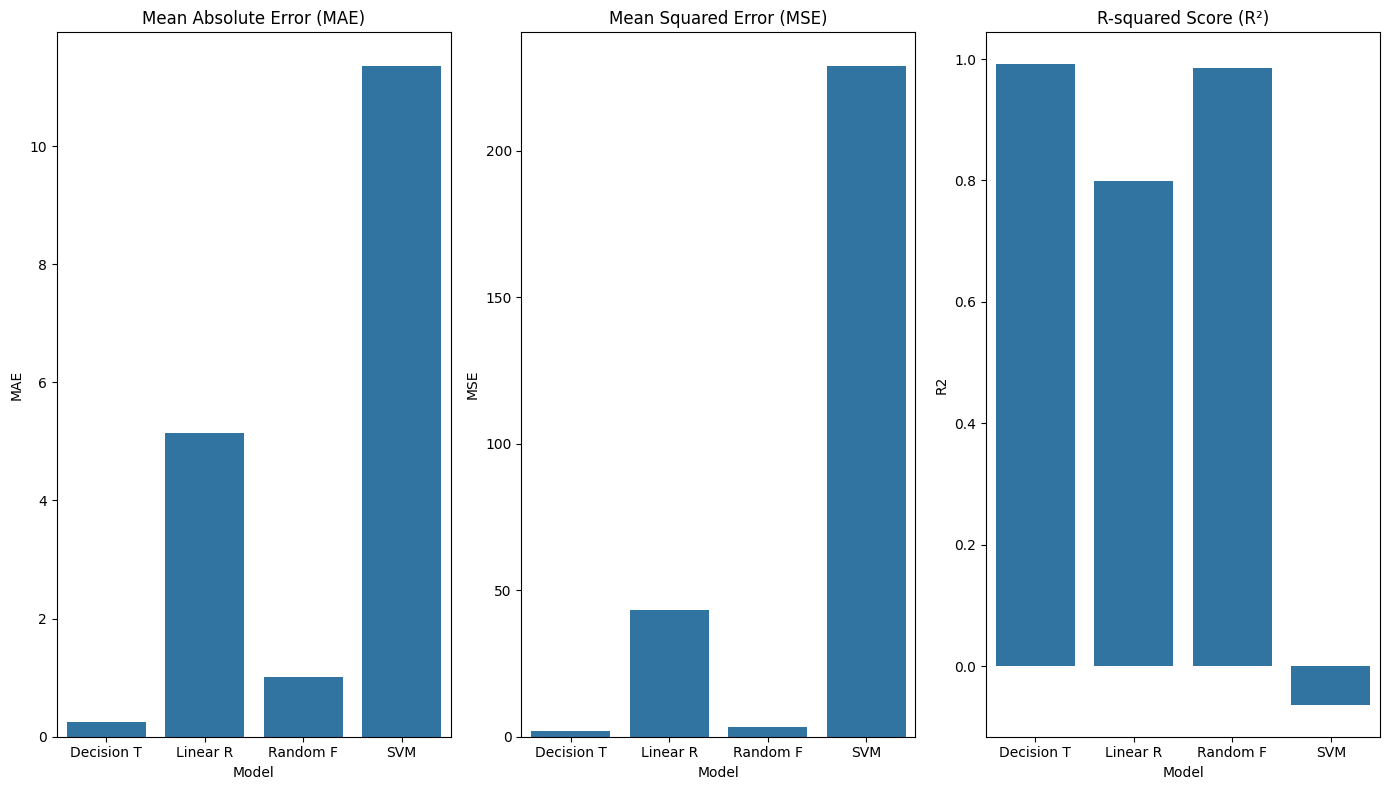

In [62]:
plt.figure(figsize=(14, 8))

# MAE
plt.subplot(1, 3, 1)
sns.barplot(x='Model', y='MAE', data=results_df)
plt.title('Mean Absolute Error (MAE)')

# MSE
plt.subplot(1, 3, 2)
sns.barplot(x='Model', y='MSE', data=results_df)
plt.title('Mean Squared Error (MSE)')

# R2 Score
plt.subplot(1, 3, 3)
sns.barplot(x='Model', y='R2', data=results_df)
plt.title('R-squared Score (R²)')

plt.tight_layout()
plt.show()


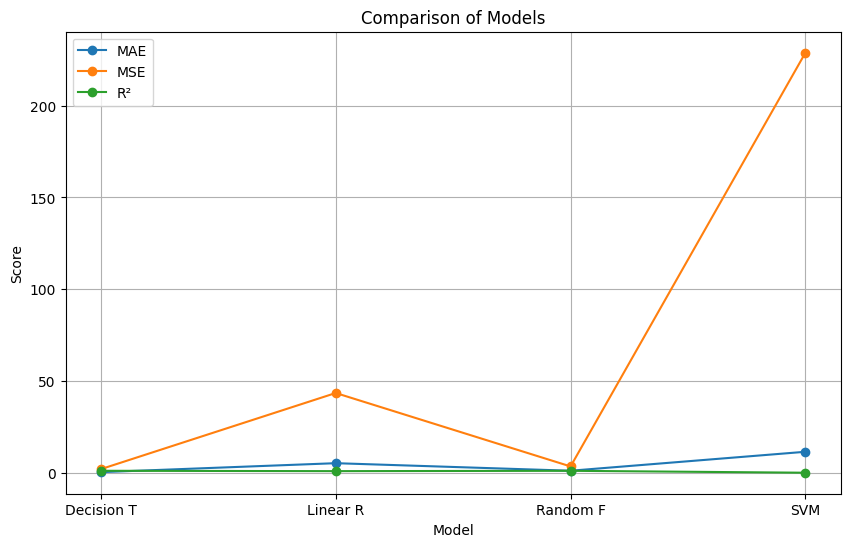

In [63]:
plt.figure(figsize=(10, 6))

# MAE Line Plot
plt.plot(results_df['Model'], results_df['MAE'], marker='o', label='MAE')

# MSE Line Plot
plt.plot(results_df['Model'], results_df['MSE'], marker='o', label='MSE')

# R2 Score Line Plot
plt.plot(results_df['Model'], results_df['R2'], marker='o', label='R²')

plt.title('Comparison of Models')
plt.xlabel('Model')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.show()


This line plot allows for an easy comparison of model performance metrics—MAE, MSE, and R²—across different models. The use of markers and lines helps in visually distinguishing the performance metrics, providing a clear picture of how each model fares in terms of accuracy and error.

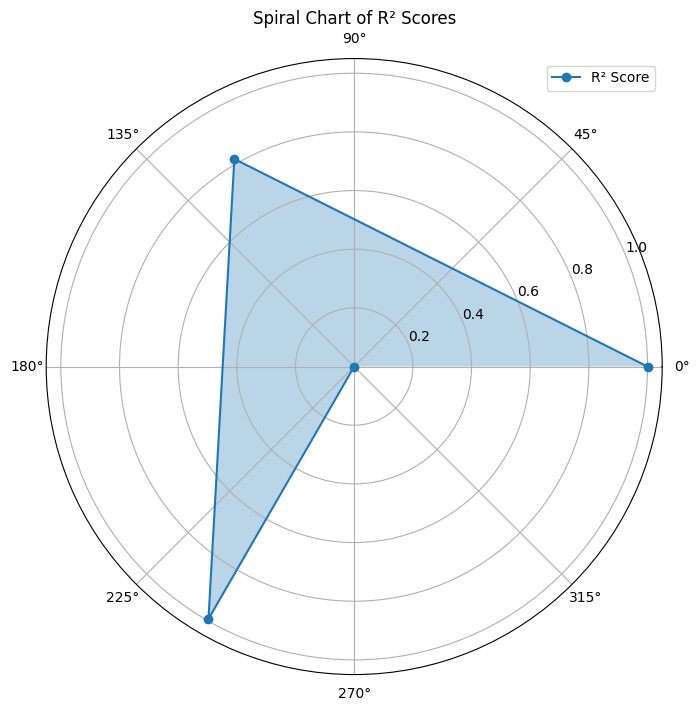

In [64]:
import numpy as np

# Normalize the R² scores for better visualization
results_df['R2_normalized'] = (results_df['R2'] - results_df['R2'].min()) / (results_df['R2'].max() - results_df['R2'].min())

# Generate theta for spiral effect
theta = np.linspace(0, 2 * np.pi * len(results_df), len(results_df))

plt.figure(figsize=(8, 8))
ax = plt.subplot(111, projection='polar')

# Spiral plot
ax.plot(theta, results_df['R2_normalized'], marker='o', label='R² Score')
ax.fill(theta, results_df['R2_normalized'], alpha=0.3)

ax.set_title('Spiral Chart of R² Scores')
plt.legend()
plt.show()


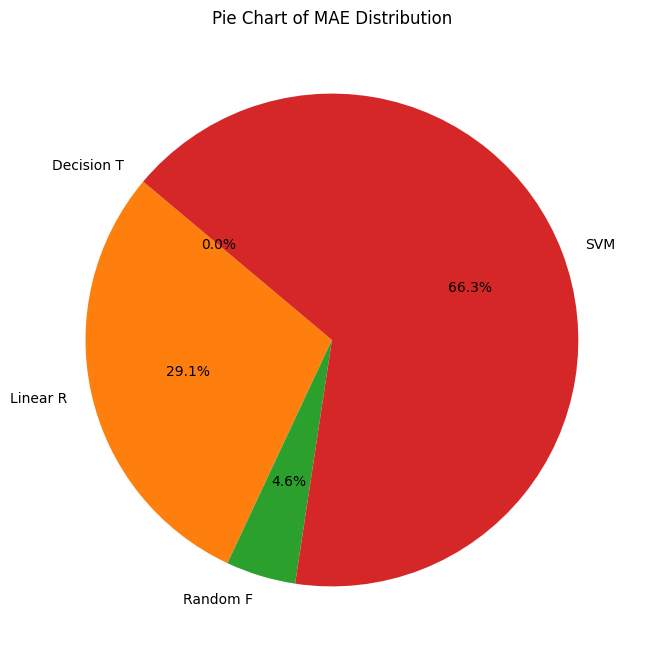

In [65]:
# Normalize MAE for better comparison (in case you want to visualize the proportionate difference)
results_df['MAE_normalized'] = (results_df['MAE'] - results_df['MAE'].min()) / (results_df['MAE'].max() - results_df['MAE'].min())

plt.figure(figsize=(8, 8))

# Pie chart for MAE
plt.pie(results_df['MAE_normalized'], labels=results_df['Model'], autopct='%1.1f%%', startangle=140)
plt.title('Pie Chart of MAE Distribution')
plt.show()


Normalization of MAE allows for a clearer comparison of model performance. The pie chart provides a visual breakdown of the proportionate MAE distribution across different models, making it easier to compare their relative accuracy.

In [33]:
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')

# Select relevant columns for time series forecasting
data = df[['Date', 'Stock Price']].copy()

In [39]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Feature Scaling
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data['Stock Price'].values.reshape(-1,1))


# Creating a dataset with 60-day time steps
look_back = 60
X, y = [], []

for i in range(look_back, len(scaled_data)):
    X.append(scaled_data[i-look_back:i, 0])
    y.append(scaled_data[i, 0])

X, y = np.array(X), np.array(y)

# Reshape data to match LSTM input
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

# Building the LSTM Model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=25))
model.add(Dense(units=1))

# Compile and train the model
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X, y, batch_size=32, epochs=50)

# Preparing test data
test_data = df[len(df) - len(y) - look_back:].copy()
test_data_scaled = scaler.transform(test_data['Stock Price'].values.reshape(-1, 1))

X_test = []
y_test = df['Stock Price'].values[look_back + len(y):]

for i in range(look_back, len(test_data_scaled)):
    X_test.append(test_data_scaled[i-look_back:i, 0])

X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Predicting Stock Prices
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

# Plotting the predictions
plt.figure(figsize=(12, 6))
plt.plot(daf['Date'], df['Stock Price'], label='Actual Stock Price')
plt.plot(df['Date'][len(df) - len(y_test):], predictions, label='Predicted Stock Price')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Stock Price Prediction')
plt.legend()
plt.show()

The process effectively demonstrates how LSTM networks can be utilized for time series forecasting, particularly in predicting stock prices. The normalization of data ensures that the LSTM network operates efficiently, while the look-back period helps the model learn patterns from historical data. The model’s architecture, with its stacked LSTM layers and dropout regularization, is designed to capture complex temporal dependencies and reduce overfitting. The final visualization helps assess the model’s accuracy and predictive power by comparing the predicted values against actual stock prices, providing insight into the model's performance and practical utility in financial forecasting.

In [66]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize and train the model
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Decision Tree Regressor:")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred)}")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred)}")
print(f"R-squared Score: {r2_score(y_test, y_pred)}")


Decision Tree Regressor:
Mean Absolute Error: 0.4292156862745374
Mean Squared Error: 3.527268627450989
R-squared Score: 0.9836169735825435


The code trains a Decision Tree Regressor model to predict stock prices. It starts by fitting the model with training data, then uses it to make predictions on test data. The model's performance is evaluated using three metrics: Mean Absolute Error (MAE), which measures the average magnitude of errors; Mean Squared Error (MSE), which penalizes larger errors more heavily; and R-squared score, which indicates how well the model explains the variance in stock prices. These metrics help assess the model's accuracy and effectiveness in predicting stock prices.








In the tasks over Week 1 and Week 2, I applied the Decision Tree algorithm to predict stock market trends for Apple and Samsung. The process involved preparing a detailed dataset, cleaning it by removing duplicates, and training the Decision Tree model. I evaluated the model's performance using accuracy metrics such as Mean Absolute Error (MAE), Mean Squared Error (MSE), and R-squared score. During Week 2, I visualized the model's performance alongside other algorithms using various charts, including pie charts, line plots, and bar plots. Additionally, I learned about parameter tuning for the Decision Tree, such as adjusting the depth of the tree and the minimum samples per leaf, to optimize its performance and accuracy. These tasks provided valuable insights into how different features influence predictions and how to effectively evaluate and tune machine learning models.